# Final Project - Global Terrorism

#### link: https://www.kaggle.com/datasets/klapeyefoundation/global-terrorism
___

<img src="stopterrorism.jpeg" width="800"/>

# Introduction
The dataset shows information about terror attacks worldwide.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
from wordcloud import WordCloud, STOPWORDS

In [2]:
warnings.filterwarnings('ignore');
mydata = pd.read_csv('https://raw.githubusercontent.com/EylonYehiel/project1/main/klapeye-global-terrorism.csv') 
mydata.head()

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
0,2022-07-16,Indonesia,Papua,NaN,South-Eastern Asia,Asia,West Papua National Liberation Army,2.0,10.0,Around 20 gunmen attacked the village of Nogol...,"-4.318185048526521, 138.18016262274278",Assault
1,2022-06-28,India,Rajasthan,Udaipur,Southern Asia,Asia,Islamists,NaN,1.0,A Hindu tailor was murdered by two Muslim assa...,"24.612639887486125, 73.69126308833513",Assault
2,2022-06-25,Norway,NaN,Oslo,Northern Europe,Europe,NaN,10.0,2.0,"Two people were killed and 21 injured, 10 of t...","59.913751261491804, 10.75215147566024",Assault
3,2022-06-18,Mali,NaN,NaN,Western Africa,Africa,Macina Liberation Front,NaN,132.0,Unidentified gunmen killed 132 civilians in Di...,"16.3700359,-2.2900239",Assault
4,2022-05-05,Israel,NaN,NaN,Western Asia,Asia,As'ad Alrafa'ani and Sabhi Shajir,4.0,3.0,"In Central Israel, two Palestinian men attacke...","31.5313113,34.8667654",Assault


#### Check missing values:

In [3]:
mydata.isnull().sum().sort_values(ascending=False)

PERPETRATOR    17022
CITY           14031
STATE          11755
REGION          6000
SUBREGION       5995
CATEGORY        5596
COORDINATES        8
INJURED            6
DEAD               1
DATE               0
COUNTRY            0
DESCRIPTION        0
dtype: int64

#### We'll handle later the missing value, if its necessary.

In [4]:
mydata.dtypes

DATE            object
COUNTRY         object
STATE           object
CITY            object
SUBREGION       object
REGION          object
PERPETRATOR     object
INJURED        float64
DEAD           float64
DESCRIPTION     object
COORDINATES     object
CATEGORY        object
dtype: object

#### Types are ok

<a id='section2'></a>

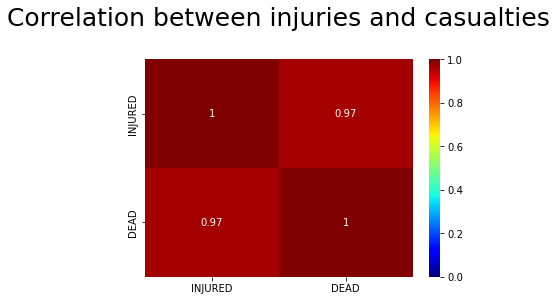

In [5]:
mydata['DAMAGE'] = mydata['INJURED'] + mydata['DEAD']
by_country = mydata.groupby('COUNTRY')[['INJURED','DEAD','DAMAGE']].sum()
by_country_no_zeros = by_country[(by_country.INJURED != 0) | (by_country.DEAD != 0)].reset_index().sort_values(by='INJURED',ascending=False)
sns.heatmap(by_country_no_zeros.drop(columns = 'DAMAGE').corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True);
plt.title('Correlation between injuries and casualties\n',fontsize = 25);

#### The strong connection between injuries and casualties shows the data makes sense.

---


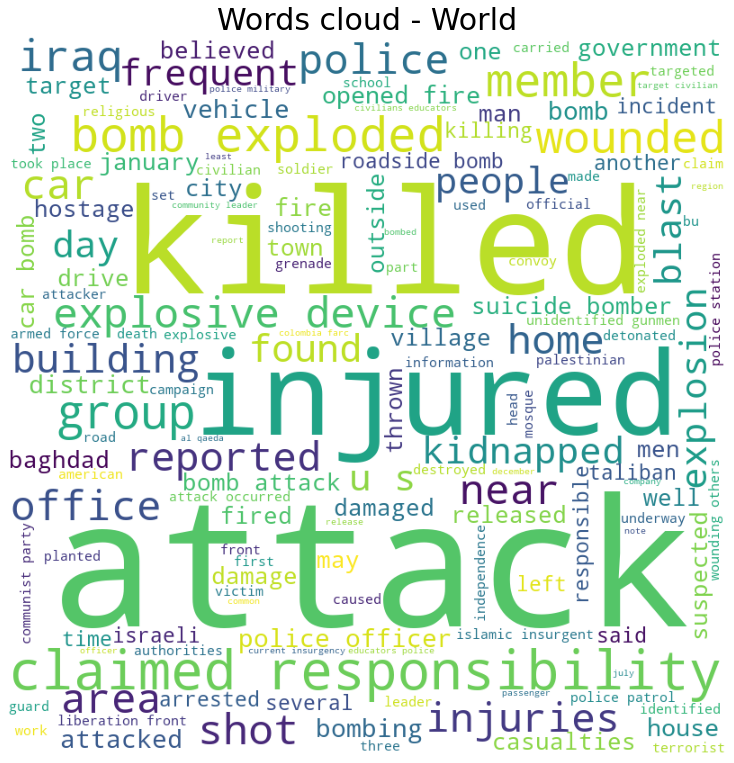

In [6]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in mydata.DESCRIPTION:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=150,
                min_font_size = 10).generate(comment_words)                   
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Words cloud - World', fontsize = 30)
plt.savefig('WordsCloud.png')
plt.show()

### This word cloud describes the most frequent words appearing in the data event's descriptions.
---

# <span style="color:blue">Distribution by perpetrator : </span>

In [7]:
prep = mydata.PERPETRATOR.value_counts(normalize = True)
prep = pd.DataFrame(prep)
prep['Precent'] = prep['PERPETRATOR'] * 100
prep.head(10)

,PERPETRATOR,Precent
Taliban,0.089376,8.937555
Revolutionary Armed Forces of Colombia (FARC),0.057611,5.761073
Communist Party,0.047845,4.784453
Basque Fatherland and Freedom (ETA),0.031765,3.176482
Hamas (Islamic Resistance Movement),0.031666,3.166617
Islamic State,0.026043,2.604321
Liberation Tigers of Tamil Eelam (LTTE),0.025747,2.574726
National Liberation Army of Colombia (ELN),0.022985,2.298510
Al Qaeda,0.022196,2.219592
Al Fatah,0.021308,2.130808


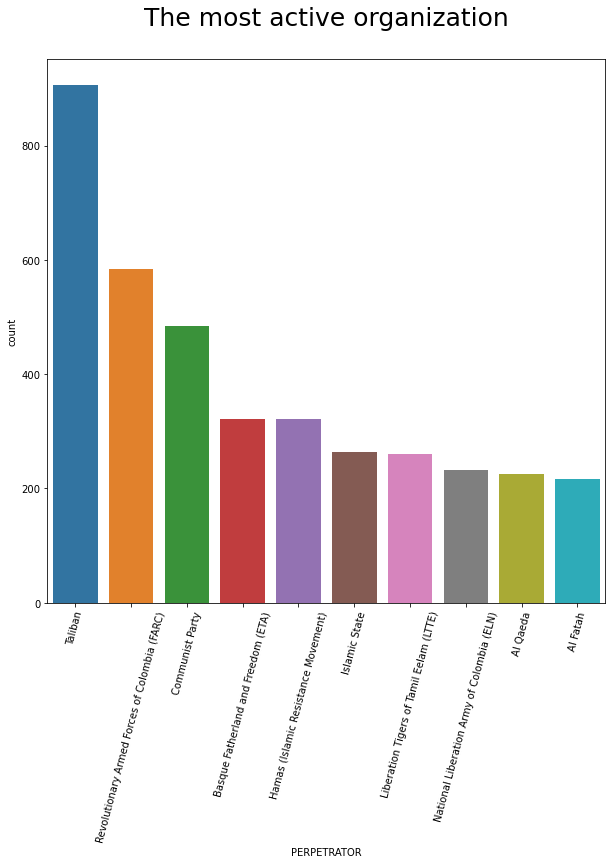

In [8]:
prep = mydata[(mydata.PERPETRATOR == 'Taliban') | (mydata.PERPETRATOR == 'Revolutionary Armed Forces of Colombia (FARC)') | (mydata.PERPETRATOR == 'Communist Party')  | (mydata.PERPETRATOR == 'Basque Fatherland and Freedom (ETA)')  | (mydata.PERPETRATOR == 'Hamas (Islamic Resistance Movement)')  | (mydata.PERPETRATOR == 'Islamic State')  | (mydata.PERPETRATOR == 'Liberation Tigers of Tamil Eelam (LTTE)')  | (mydata.PERPETRATOR == 'National Liberation Army of Colombia (ELN)')  | (mydata.PERPETRATOR == 'Al Qaeda')  | (mydata.PERPETRATOR == 'Al Fatah') ] 
ord = ['Taliban','Revolutionary Armed Forces of Colombia (FARC)','Communist Party','Basque Fatherland and Freedom (ETA)','Hamas (Islamic Resistance Movement)','Islamic State','Liberation Tigers of Tamil Eelam (LTTE)','National Liberation Army of Colombia (ELN)','Al Qaeda','Al Fatah']
plt.figure(figsize=(10,10))
plt.xticks(rotation = 75)
sns.countplot(data = prep, x = 'PERPETRATOR', order=ord,dodge=True);
plt.title('The most active organization\n',fontsize = 25);

---

## The connection to the continent: 

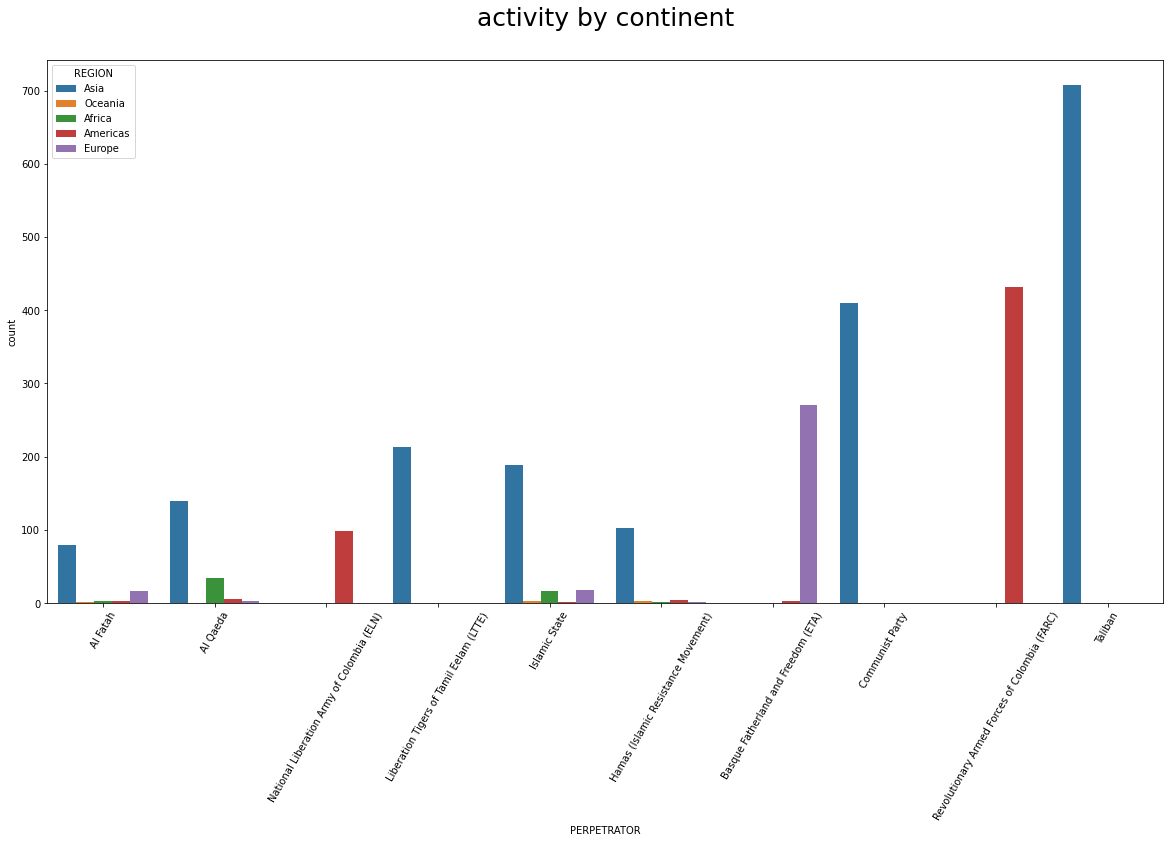

In [9]:
prep = mydata[(mydata.PERPETRATOR == 'Taliban') | (mydata.PERPETRATOR == 'Revolutionary Armed Forces of Colombia (FARC)') | (mydata.PERPETRATOR == 'Communist Party')  | (mydata.PERPETRATOR == 'Basque Fatherland and Freedom (ETA)')  | (mydata.PERPETRATOR == 'Hamas (Islamic Resistance Movement)')  | (mydata.PERPETRATOR == 'Islamic State')  | (mydata.PERPETRATOR == 'Liberation Tigers of Tamil Eelam (LTTE)')  | (mydata.PERPETRATOR == 'National Liberation Army of Colombia (ELN)')  | (mydata.PERPETRATOR == 'Al Qaeda')  | (mydata.PERPETRATOR == 'Al Fatah')]
plt.figure(figsize=(20,10))
plt.xticks(rotation = 60)
sns.countplot(data = prep, x = 'PERPETRATOR',hue="REGION",order = ord[::-1]);
plt.title('activity by continent\n',fontsize = 25);

### We can see where every organization acts:
* most of the perpetrators are focusing on one continent each (one line).
* The main perpetrators are concentrating in Asia.
* There are little terror cases in Oceania. 


---

## Who is the most active organization in world's history ?
#### Defining "Effectiveness" as the ratio between the caused damage and the number of incidents:

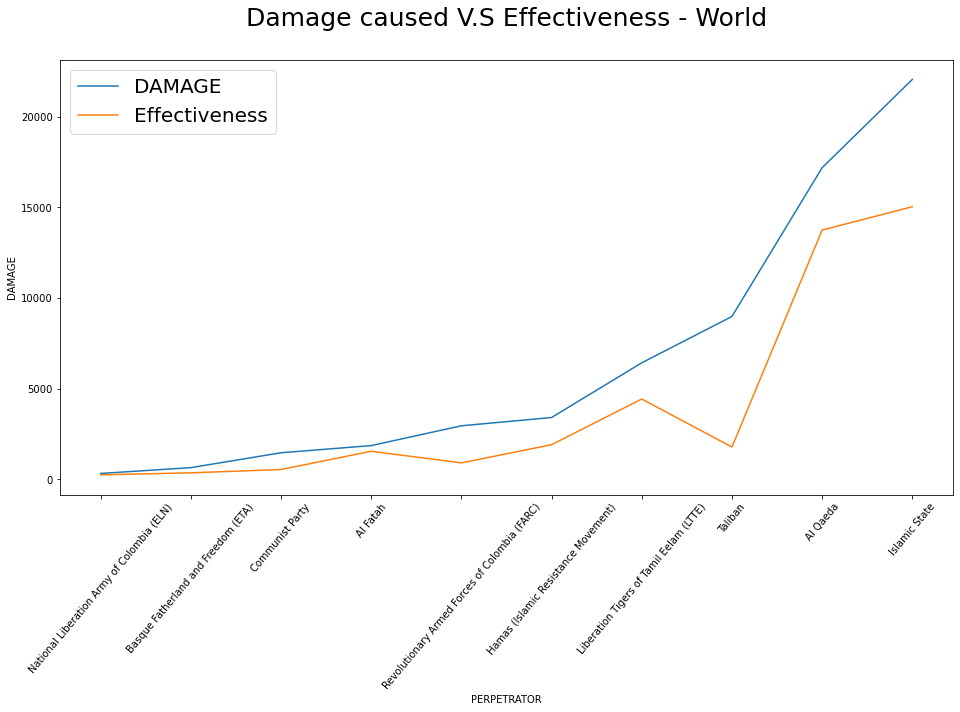

In [10]:
prep['DAMAGE'] = prep['DEAD'] + prep['INJURED']
forcor = prep.groupby('PERPETRATOR').sum()[['DAMAGE']]
forcor['SIZE'] = mydata.groupby('PERPETRATOR').size()
forcor = forcor.dropna()
forcor['Effectiveness'] = (forcor['DAMAGE'] / forcor['SIZE']) *180

plt.figure(figsize = (16,8))
sns.lineplot(data = forcor.reset_index().sort_values('DAMAGE'), x = 'PERPETRATOR', y = 'DAMAGE', markers=True, dashes=False)
sns.lineplot(data = forcor.reset_index(), x = 'PERPETRATOR', y = 'Effectiveness' ,markers=True)
plt.xticks(rotation = 50);
plt.title('Damage caused V.S Effectiveness - World\n',fontsize = 25);
plt.legend(['DAMAGE','Effectiveness'],fontsize = 20)
plt.show()

> ## Observation:
* The organizations who caused the most damage are ISIS, Al-Qaeda and Taliban.
* The most effective (=dangerous) organizations are ISIS, Al-Qaeda and LTTE.
* We can see that Taliban making a lot of damage but with low effectiveness - many events.
* From the graph and similars, we can conclude about the nature of the organization and its methods of operation.

---

# <span style="color:blue">Looking at results by country: </span>

In [11]:
by_country.sort_values('DAMAGE',ascending = False).head(7)

,INJURED,DEAD,DAMAGE
COUNTRY,,,
Iraq,42382.0,23045.0,65416.0
India,11074.0,4305.0,15378.0
Pakistan,10825.0,4302.0,15127.0
Afghanistan,8938.0,6052.0,14990.0
Israel,8177.0,1770.0,9942.0
United States,5797.0,3517.0,9314.0
Sri Lanka,5543.0,2871.0,8414.0


#### Defining 'damag'e as the sum of injured and casualties.

In [12]:
newdata = mydata.dropna(subset = ['INJURED','DEAD']).copy()
damage_by_country = newdata.groupby('COUNTRY')[['DAMAGE']].sum()
sorted_damage_by_country = damage_by_country.sort_values('DAMAGE',ascending = False).reset_index().head(15)

### After droping Iraq (to clear the data):

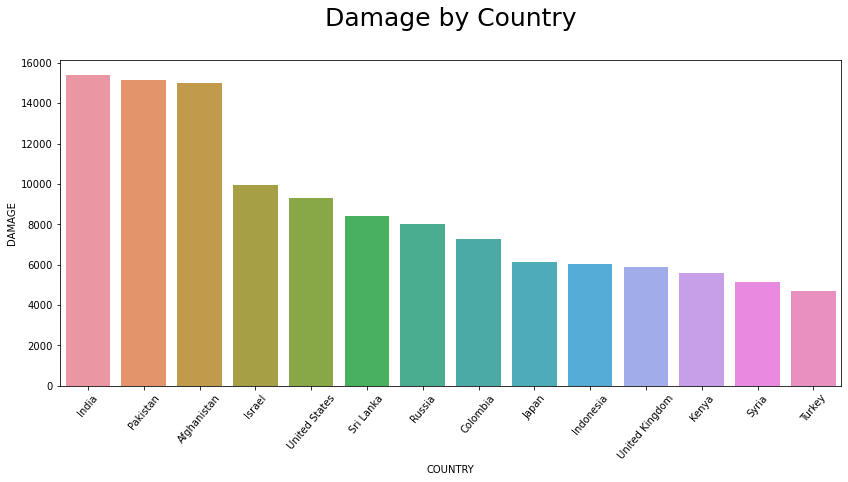

In [13]:
plt.figure(figsize=(14,6));
sns.barplot(data = sorted_damage_by_country[sorted_damage_by_country.COUNTRY != 'Iraq'] ,x = 'COUNTRY', y = 'DAMAGE',ci = None);
plt.xticks(rotation = 50)
plt.title('Damage by Country\n',fontsize = 25);
plt.show()

In [14]:
sorted_damage_by_country.head(7)

,COUNTRY,DAMAGE
0,Iraq,65416.0
1,India,15378.0
2,Pakistan,15127.0
3,Afghanistan,14990.0
4,Israel,9942.0
5,United States,9314.0
6,Sri Lanka,8414.0


## Israel is 5th in the `world`!

---

## <span style="color:green"> Let's focus: </span>

<img src="israelflag.jpeg" width="300"/>

In [15]:
israel = mydata[mydata.COUNTRY == 'Israel'].copy()
israel['YEAR'] = [int(x.split('-')[0]) for x in israel.DATE]
israel_reverse_date = israel.iloc[::-1]
israel.head()

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY,DAMAGE,YEAR
4,2022-05-05,Israel,NaN,NaN,Western Asia,Asia,As'ad Alrafa'ani and Sabhi Shajir,4.0,3.0,"In Central Israel, two Palestinian men attacke...","31.5313113,34.8667654",Assault,7.0,2022
10,2022-04-07,Israel,Tel Aviv District,Tel Aviv,Western Asia,Asia,Raad Hazem,11.0,3.0,A gunman killed 3 people and wounded 11 others...,"32.0852997,34.7818064",Assault,14.0,2022
12,2022-03-29,Israel,NaN,Bnei Brak,Western Asia,Asia,Al-Aqsa Martyrs' Brigades,NaN,5.0,A Palestinian man killed 5 people in a mass sh...,"32.0873899,34.8324376",Assault,NaN,2022
13,2022-03-27,Israel,Haifa District,Hadera,Western Asia,Asia,Islamic State,12.0,2.0,Two ISIL gunmen fired at civilians and police ...,"32.43699,34.9198258",Assault,14.0,2022
14,2022-03-22,Israel,Southern District,Beersheba,Western Asia,Asia,Mohammed Abu al-Kiyan,2.0,4.0,A Negev Bedouin man stabbed and ran over sever...,"31.2457442,34.7925181",Assault,6.0,2022


# Which words appear the most?

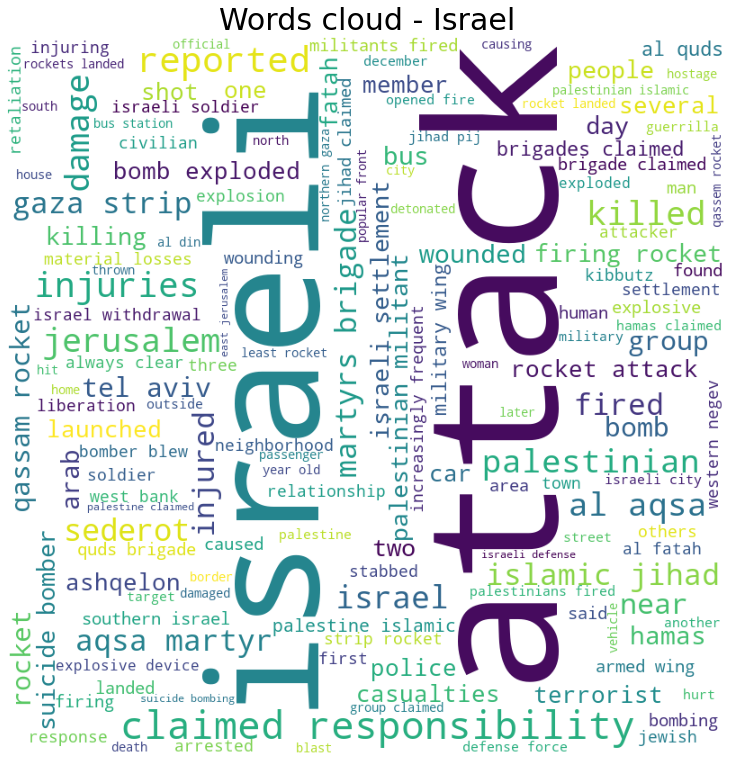

In [16]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in israel.DESCRIPTION:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=150,
                min_font_size = 10).generate(comment_words)                   
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Words cloud - Israel', fontsize = 30)
plt.savefig('WordsCloud.png')
plt.show()

## It can be seen that some cities appears the most, Can you tell which? 
#### Full information will be presented later in detail.
---

## Comparing israel to big countries worldwide:

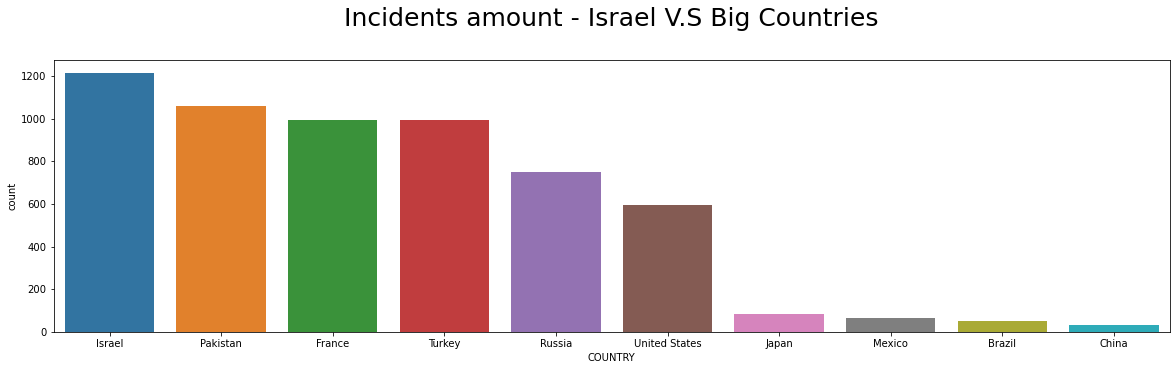

In [17]:
countries = mydata[(mydata.COUNTRY == 'Israel') | (mydata.COUNTRY == 'United States') | (mydata.COUNTRY == 'Russia') | (mydata.COUNTRY == 'China') | (mydata.COUNTRY == 'Brazil') | (mydata.COUNTRY == 'Japan') | (mydata.COUNTRY == 'France') | (mydata.COUNTRY == 'Pakistan') | (mydata.COUNTRY == 'Mexico') | (mydata.COUNTRY == 'Turkey')]
plt.figure(figsize = (20,5))
sns.countplot(data = countries, x = 'COUNTRY',order = ['Israel','Pakistan','France','Turkey','Russia','United States','Japan','Mexico','Brazil','China']);
plt.title('Incidents amount - Israel V.S Big Countries\n',fontsize = 25);

### As you can see, unfortunately, Israel is above many countries in the number of terrorist incidents, despite its small size.

---

## Incidents by years:

In [18]:
gb_year_sum = israel.groupby("YEAR").sum()
gb_year_size = israel.groupby("YEAR").size()

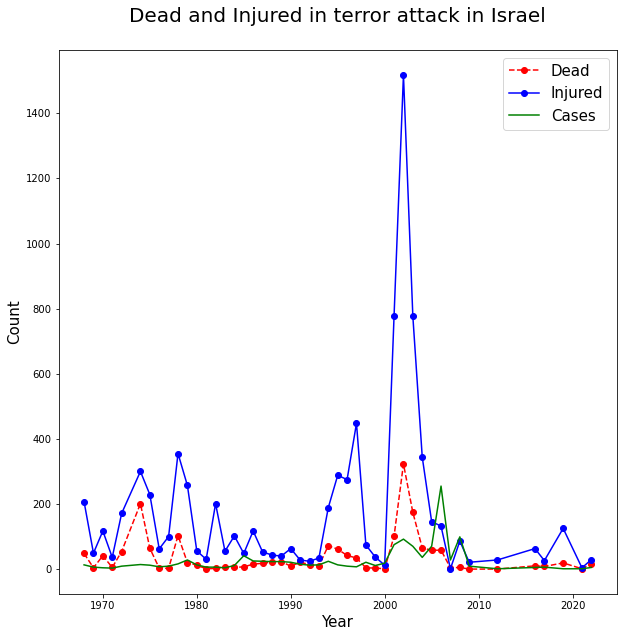

,INJURED,DEAD,DAMAGE
YEAR,,,
2002,1518.0,323.0,1841.0
2003,776.0,174.0,950.0
2001,778.0,101.0,879.0
1974,300.0,201.0,501.0
1997,448.0,34.0,482.0
1978,355.0,103.0,458.0
2004,344.0,65.0,409.0


In [19]:
plt.figure(figsize = (10,10))
plt.plot(gb_year_sum.DEAD,'ro--')
plt.plot(gb_year_sum.INJURED,'bo-')
plt.plot(gb_year_size, color = 'g')
plt.title('Dead and Injured in terror attack in Israel\n', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(['Dead','Injured','Cases'],fontsize = 15)
plt.show()
gb_year_sum.sort_values('DAMAGE',ascending = False).head(7)

#### What caused the biggest events' amount decrease?

In [20]:
pd.DataFrame(gb_year_size.sort_values(0,ascending = False).head(7))

,0
YEAR,
2006,255
2008,99
2002,92
2001,75
2005,70
2003,70
1985,41


> ## Observation:

* The 1970's and 1980's were full of terrorist attacks, it is possible to notice the relative calm that was around 1990.
* In 1994-1995 the engineer "Yahia Ayash" caused many terrorist attacks in Israel. An order was issued to eliminate him and in 1996 he was eliminated, which led to 3 deadly attacks this year.
* Following that, in the years 1994-1997 there was an increase in the `effects` of the attacks - small amount, big damage. 
* After the `Intifada` in 2000, there's increase in number of incidents and also in the damage amount.
* 2002 - record of damage caused by terrorism - led to "Homat-Magen" operation.
* The maximum `amount of cases` was in 2006 - A large amount of events with a small amount of damage.
* In 2007, Hamas took control of the Gaza Strip, which resulted in injuries and attacks amount.
* `Due technological improvements` in the recent years (2010-present), Israel has improved in dealing with terrorism.
* After significant incidents there is consistently sharp decline.


<img src="tecnological.jpg" width="700"/>

### Other significant cases:

In [21]:
mxinj = israel[israel.INJURED ==israel.INJURED.max()]
print(mxinj.DESCRIPTION.values)
mxinj

['Three suicide bombers attacked the Yehuda shopping mall in Jerusalem. Seven people were killed including 1 American teenager. 200 people were injured. Izz el Din al Qassam Brigades (HAMAS) claimed responsibility. ']


,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY,DAMAGE,YEAR
20169,1997-09-04,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Hamas (Islamic Resistance Movement),200.0,7.0,Three suicide bombers attacked the Yehuda shop...,"31.7788242,35.2257626",Explosion,207.0,1997


##### Not accurate - 2 bombers, 178 injuries, 16 casualties.
https://he.wikipedia.org/wiki/%D7%94%D7%A4%D7%99%D7%92%D7%95%D7%A2_%D7%91%D7%A9%D7%95%D7%A7_%D7%9E%D7%97%D7%A0%D7%94_%D7%99%D7%94%D7%95%D7%93%D7%94_(1997)


In [22]:
mxde = israel[israel.DEAD ==israel.DEAD.max()]
print(mxde.DESCRIPTION.values)
mxde

['A Trans World Airlines jet with 88 persons aboard crashed into the Ionian Sea off Greece after a bomb apparently hidden in the baggage compartment exploded. There were no survivors. The Organization of Arab Nationalist Youth for the Liberation of Palestine (ANYO) claimed responsibility for the crash. It was later determined that the explosion was set by the PFLP GC. The airliner began its trip, Flight 841, in Tel Aviv. After an intermediate stop in Athens, it was en route to Rome when it was seen to pitch up suddenly into a sharp climb and then nose dive into the ocean. ']


,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY,DAMAGE,YEAR
26261,1974-09-07,Israel,Tel Aviv District,Tel Aviv,Western Asia,Asia,Popular Front for the Liberation of Palestine ...,0.0,88.0,A Trans World Airlines jet with 88 persons abo...,"32.0852997,34.7818064",Explosion,88.0,1974


https://he.wikipedia.org/wiki/%D7%98%D7%99%D7%A1%D7%94_841_%D7%A9%D7%9C_%D7%98%D7%A8%D7%90%D7%A0%D7%A1_%D7%95%D7%95%D7%A8%D7%9C%D7%93_%D7%90%D7%99%D7%99%D7%A8%D7%9C%D7%99%D7%99%D7%A0%D7%A1

---

## `Amount of incidents` by major cities:
#### * The data do not include the territories of Judea and Samaria.

In [23]:
pd.DataFrame(israel.CITY.value_counts().head(3))

,CITY
Jerusalem,266
Sederot,194
Tel Aviv,100


### On the map:

In [24]:
isr_coord = [31.91168496127389, 34.95629119537465]
map_isr = folium.Map(location=isr_coord, zoom_start=12, tiles='cartodbpositron', width=600, height=600)
for j in israel.COORDINATES:
    [folium.CircleMarker(j.split(','), radius=5,color='#0089bb', fill_color='#0089bb').add_to(map_isr)];
    if j == '31.7788242,35.2257626':
        [folium.CircleMarker(j.split(','), radius=12,color='#1245bb', fill_color='#1245bb',icon = folium.Icon(color="red", icon="info-sign")).add_to(map_isr)];
    if j == '32.0852997,34.7818064':
        [folium.CircleMarker(j.split(','), radius=10,color='#0089bb', fill_color='#0089bb',icon = folium.Icon(color="red", icon="info-sign")).add_to(map_isr)];   
    if j == '31.526474,34.5969696':
        [folium.CircleMarker(j.split(','), radius=7.5,color='#0089bb', fill_color='#0089bb',icon = folium.Icon(color="red", icon="info-sign")).add_to(map_isr)];     
map_isr

> ## Observation:
* We can see on the map and on Israel's word cloud the main places where terrorist attacks took place in Israel. 
* It can be concluded that Jerusalem is the most vulnerable place - where a large number of terrorist attacks happen.
* Every main point has different "reason to be attacked".

---
### Who is the most active organization in Israel in from 1968 until now?

In [25]:
isize = pd.DataFrame(israel.groupby('PERPETRATOR').size().sort_values(ascending = False))
w = pd.DataFrame(mydata.groupby('PERPETRATOR').size().sort_values(ascending = False))
isrprep = israel.groupby('PERPETRATOR')[['DAMAGE']].sum().sort_values('DAMAGE',ascending = False).head(15)
isrprep['SIZE'] = isize[0]
isrprep.head(5)

,DAMAGE,SIZE
PERPETRATOR,,
Hamas (Islamic Resistance Movement),2883.0,128
Al Fatah,1562.0,95
Palestine Islamic Jihad (PIJ),989.0,111
Palestine Liberation Organization (PLO),746.0,51
Popular Front for the Liberation of Palestine (PFL),612.0,44


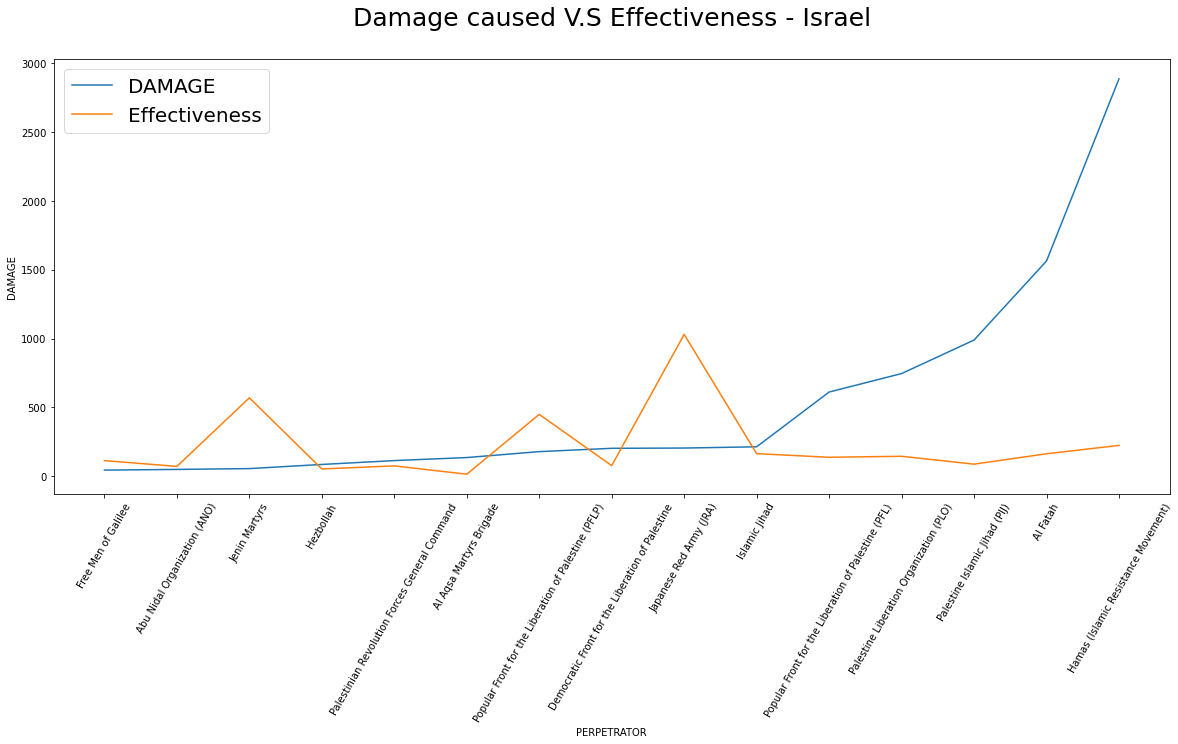

In [26]:
isrprep['Effectiveness'] = (isrprep['DAMAGE'] / isrprep['SIZE'])*10
plt.figure(figsize = (20,8))
sns.lineplot(data = isrprep.reset_index().sort_values('DAMAGE'), x = 'PERPETRATOR', y = 'DAMAGE', markers=True, dashes=False)
sns.lineplot(data = isrprep.reset_index(), x = 'PERPETRATOR', y = 'Effectiveness' ,markers=True)
plt.xticks(rotation = 60);
plt.title('Damage caused V.S Effectiveness - Israel\n',fontsize = 25);
plt.legend(['DAMAGE','Effectiveness'],fontsize = 20)
plt.show()

> ## Observation:
* The characterization of organization divided into 2 - big damage versus big efficiency.
* We would recommend being careful of organizations with a high damage value, such as ISIS, Al-Fatah and PIJ.
* In the other hand, we would recommend the security forces to concentrate efforts on "efficient" organizations such as JRA, PFLP and Jenin-Martyrs to prevent large-scales disasters.
---

# In Conclusion:
Since the dawn of its establishment, Israel has faced security challenges that harm its citizens.
With the correct data analysis and drawing relevant conclusions according to the current reality, it is possible to identify recurring patterns and even use some predictions in order to anticipate the next incidents and prevent them.

### We wish you peaceful and quiet days!
